In [1]:
# !pip install mlrose-hiive
# !pip install chess

In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
import chess

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner, NNGSRunner

## Optimization Problem : Max K Color

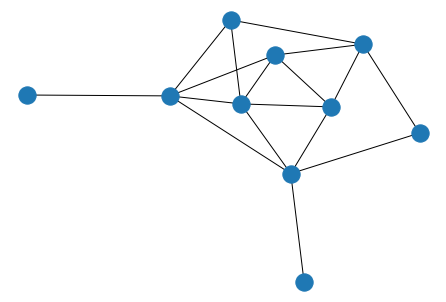

In [2]:
# Generate a new Max K problem using a fixed seed.
problem = MaxKColorGenerator().generate(seed=123456, number_of_nodes=10, max_connections_per_node=3, max_colors=3)

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 3))
plt.show()

### Algorithm 1: Randomized Hill Climbing

In [3]:
rhc = RHCRunner(problem=problem,
                    experiment_name='max_k_rhc',
                    output_directory=None,
                    seed=123,
                    iteration_list=2 ** np.arange(11),
                    max_attempts=500,
                    restart_list=[5, 10, 20, 50, 75, 100])   
# the two data frames will contain the results
df_run_stats, df_run_curves = rhc.run() 

In [4]:
df_run_stats.iloc[:60]

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,6.0,0,0.000143,"[2, 1, 2, 2, 0, 2, 2, 1, 2, 1]",5,1024,0
1,1,6.0,1,0.002679,"[2, 1, 2, 2, 0, 2, 2, 1, 2, 1]",5,1024,0
2,2,5.0,3,0.004754,"[1, 1, 2, 2, 0, 2, 2, 1, 2, 1]",5,1024,0
3,4,5.0,5,0.007129,"[1, 1, 2, 2, 0, 2, 2, 1, 2, 1]",5,1024,0
4,8,4.0,10,0.009705,"[0, 1, 2, 2, 0, 2, 2, 1, 2, 1]",5,1024,0
5,16,2.0,19,0.012461,"[0, 1, 2, 0, 0, 2, 2, 1, 2, 1]",5,1024,0
6,32,0.0,21,0.014627,"[0, 1, 2, 0, 0, 2, 0, 1, 2, 1]",5,1024,0
7,64,0.0,21,0.014627,"[0, 1, 2, 0, 0, 2, 0, 1, 2, 1]",5,1024,0
8,128,0.0,21,0.014627,"[0, 1, 2, 0, 0, 2, 0, 1, 2, 1]",5,1024,0
9,256,0.0,21,0.014627,"[0, 1, 2, 0, 0, 2, 0, 1, 2, 1]",5,1024,0


In [5]:
df_run_curves.iloc[:60]

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000143,6.0,0.0,5,1024,0
1,1,0.002679,6.0,1.0,5,1024,0
2,2,0.004754,5.0,3.0,5,1024,0
3,3,0.007062,5.0,4.0,5,1024,0
4,4,0.007129,5.0,5.0,5,1024,0
5,5,0.009499,5.0,6.0,5,1024,0
6,6,0.009568,5.0,7.0,5,1024,0
7,7,0.009645,4.0,9.0,5,1024,0
8,8,0.009705,4.0,10.0,5,1024,0
9,9,0.011990,2.0,12.0,5,1024,0


In [6]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
best_runs

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
17,17,0.014627,0.0,21.0,5,1024,0
35,17,0.014627,0.0,21.0,10,1024,0
53,17,0.014627,0.0,21.0,20,1024,0
71,17,0.014627,0.0,21.0,50,1024,0
89,17,0.014627,0.0,21.0,75,1024,0
107,17,0.014627,0.0,21.0,100,1024,0


In [7]:
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
best_curve_run

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
17,17,0.014627,0.0,21.0,5,1024,0
35,17,0.014627,0.0,21.0,10,1024,0
53,17,0.014627,0.0,21.0,20,1024,0
71,17,0.014627,0.0,21.0,50,1024,0
89,17,0.014627,0.0,21.0,75,1024,0
107,17,0.014627,0.0,21.0,100,1024,0


In [8]:
best_Restarts = best_curve_run['Restarts'].iloc()[0]

print(f'Best Restarts: {best_Restarts}')

Best Restarts: 5


In [9]:
run_stats_best_run = df_run_stats[df_run_stats['Restarts'] == best_Restarts]
run_stats_best_run

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,6.0,0,0.000143,"[2, 1, 2, 2, 0, 2, 2, 1, 2, 1]",5,1024,0
1,1,6.0,1,0.002679,"[2, 1, 2, 2, 0, 2, 2, 1, 2, 1]",5,1024,0
2,2,5.0,3,0.004754,"[1, 1, 2, 2, 0, 2, 2, 1, 2, 1]",5,1024,0
3,4,5.0,5,0.007129,"[1, 1, 2, 2, 0, 2, 2, 1, 2, 1]",5,1024,0
4,8,4.0,10,0.009705,"[0, 1, 2, 2, 0, 2, 2, 1, 2, 1]",5,1024,0
5,16,2.0,19,0.012461,"[0, 1, 2, 0, 0, 2, 2, 1, 2, 1]",5,1024,0
6,32,0.0,21,0.014627,"[0, 1, 2, 0, 0, 2, 0, 1, 2, 1]",5,1024,0
7,64,0.0,21,0.014627,"[0, 1, 2, 0, 0, 2, 0, 1, 2, 1]",5,1024,0
8,128,0.0,21,0.014627,"[0, 1, 2, 0, 0, 2, 0, 1, 2, 1]",5,1024,0
9,256,0.0,21,0.014627,"[0, 1, 2, 0, 0, 2, 0, 1, 2, 1]",5,1024,0


In [10]:
best_state = run_stats_best_run.tail(1)
best_state

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
11,1024,0.0,21,0.014627,"[0, 1, 2, 0, 0, 2, 0, 1, 2, 1]",5,1024,0


In [11]:
opt_curve=df_run_curves[(df_run_curves['Restarts']==best_state['Restarts'].iloc[0]) & (df_run_curves['current_restart']==best_state['current_restart'].iloc[0])]
opt_curve

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000143,6.0,0.0,5,1024,0
1,1,0.002679,6.0,1.0,5,1024,0
2,2,0.004754,5.0,3.0,5,1024,0
3,3,0.007062,5.0,4.0,5,1024,0
4,4,0.007129,5.0,5.0,5,1024,0
5,5,0.009499,5.0,6.0,5,1024,0
6,6,0.009568,5.0,7.0,5,1024,0
7,7,0.009645,4.0,9.0,5,1024,0
8,8,0.009705,4.0,10.0,5,1024,0
9,9,0.011990,2.0,12.0,5,1024,0


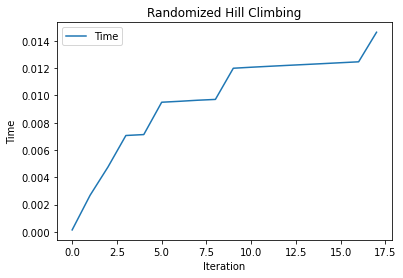

In [12]:
plt.plot(opt_curve['Iteration'],opt_curve['Time'],label='Time')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.legend()
plt.title('Randomized Hill Climbing')
plt.show()

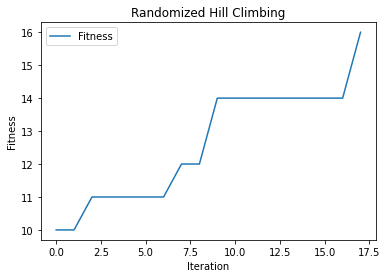

In [13]:
plt.plot(opt_curve['Iteration'],16-opt_curve['Fitness'],label='Fitness')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.title('Randomized Hill Climbing')
plt.show()

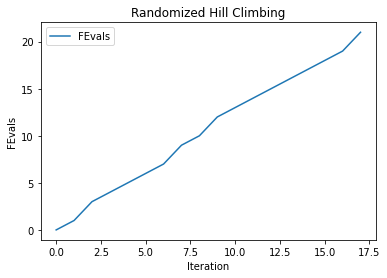

In [14]:
plt.plot(opt_curve['Iteration'],opt_curve['FEvals'],label='FEvals')
plt.xlabel('Iteration')
plt.ylabel('FEvals')
plt.legend()
plt.title('Randomized Hill Climbing')
plt.show()

In [15]:
result1=best_state[['Fitness','FEvals','Time','State']]
result1['Algorithm']='Randomized Hill Climbing'

In [16]:
color_indexes = literal_eval(run_stats_best_run['State'].tail(1).values[0])
ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
print(ordered_state)

[0, 2, 2, 1, 0, 0, 0, 1, 1, 2]


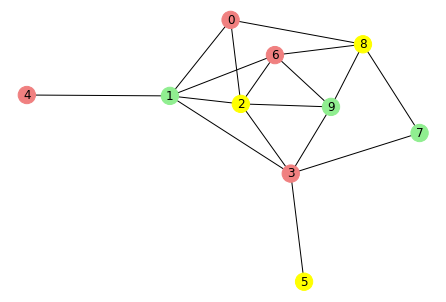

In [17]:
colors = ['lightcoral', 'lightgreen', 'yellow']
node_color_map = [colors[s] for s in ordered_state]

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 3),
        with_labels=True,
        node_color=node_color_map)
plt.show()

### Algorithm 2: Simulated Annealing

In [70]:
# Generate a new Max K problem using a fixed seed.
problem = MaxKColorGenerator().generate(seed=123456, number_of_nodes=10, max_connections_per_node=3, max_colors=3)

In [71]:
# create a runner class and solve the problem
sa = SARunner(problem=problem,
              experiment_name='max_k_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=123456,
              iteration_list=2 ** np.arange(11),
              max_attempts=500,
              temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0],
              decay_list=[mlrose_hiive.GeomDecay])

# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run()

In [72]:
df_run_stats.iloc[:60]

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,3.0,0,0.000133,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2]",geometric,0.10,0.99,0.001,0.100000,0.1,1024
1,1,3.0,1,0.003058,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2]",geometric,0.10,0.99,0.001,0.099997,0.1,1024
2,2,3.0,3,0.005546,"[1, 2, 2, 1, 0, 0, 1, 0, 2, 2]",geometric,0.10,0.99,0.001,0.099994,0.1,1024
3,4,3.0,7,0.007951,"[1, 2, 2, 1, 1, 0, 0, 0, 2, 2]",geometric,0.10,0.99,0.001,0.099992,0.1,1024
4,8,2.0,13,0.010374,"[1, 2, 0, 1, 1, 2, 0, 0, 2, 2]",geometric,0.10,0.99,0.001,0.099990,0.1,1024
5,16,2.0,23,0.013300,"[1, 2, 0, 1, 0, 0, 0, 0, 2, 2]",geometric,0.10,0.99,0.001,0.099987,0.1,1024
6,32,1.0,44,0.017345,"[1, 2, 0, 1, 0, 0, 1, 0, 2, 2]",geometric,0.10,0.99,0.001,0.099983,0.1,1024
7,64,1.0,81,0.023495,"[1, 2, 0, 1, 0, 0, 1, 0, 0, 2]",geometric,0.10,0.99,0.001,0.099976,0.1,1024
8,128,0.0,100,0.027972,"[1, 2, 0, 1, 0, 0, 1, 2, 0, 2]",geometric,0.10,0.99,0.001,0.099972,0.1,1024
9,256,0.0,100,0.027972,"[1, 2, 0, 1, 0, 0, 1, 2, 0, 2]",geometric,0.10,0.99,0.001,0.099972,0.1,1024


In [73]:
df_run_curves

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000133,3.0,0.0,0.1,1024
1,1,0.003058,3.0,1.0,0.1,1024
2,2,0.005546,3.0,3.0,0.1,1024
3,3,0.007861,3.0,5.0,0.1,1024
4,4,0.007951,3.0,7.0,0.1,1024
...,...,...,...,...,...,...
656,189,0.016049,1.0,323.0,5.0,1024
657,190,0.016123,1.0,324.0,5.0,1024
658,191,0.016212,1.0,326.0,5.0,1024
659,192,0.016296,1.0,327.0,5.0,1024


In [74]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
best_runs

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
80,80,0.027972,0.0,100.0,0.1,1024
162,81,0.000105,0.0,102.0,0.5,1024
265,102,0.015971,0.0,142.0,0.75,1024
363,97,0.013424,0.0,137.0,1.0,1024
466,102,0.015971,0.0,168.0,2.0,1024
660,193,0.016371,0.0,329.0,5.0,1024


In [75]:
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
best_curve_run

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
80,80,0.027972,0.0,100.0,0.1,1024


In [76]:
best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp

print(f'Best initial temperature: {best_init_temperature}')

Best initial temperature: 0.1


In [77]:
run_stats_best_run = df_run_stats[df_run_stats['schedule_init_temp'] == best_init_temperature]
run_stats_best_run

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,3.0,0,0.000133,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2]",geometric,0.1,0.99,0.001,0.100000,0.1,1024
1,1,3.0,1,0.003058,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2]",geometric,0.1,0.99,0.001,0.099997,0.1,1024
2,2,3.0,3,0.005546,"[1, 2, 2, 1, 0, 0, 1, 0, 2, 2]",geometric,0.1,0.99,0.001,0.099994,0.1,1024
3,4,3.0,7,0.007951,"[1, 2, 2, 1, 1, 0, 0, 0, 2, 2]",geometric,0.1,0.99,0.001,0.099992,0.1,1024
4,8,2.0,13,0.010374,"[1, 2, 0, 1, 1, 2, 0, 0, 2, 2]",geometric,0.1,0.99,0.001,0.099990,0.1,1024
5,16,2.0,23,0.013300,"[1, 2, 0, 1, 0, 0, 0, 0, 2, 2]",geometric,0.1,0.99,0.001,0.099987,0.1,1024
6,32,1.0,44,0.017345,"[1, 2, 0, 1, 0, 0, 1, 0, 2, 2]",geometric,0.1,0.99,0.001,0.099983,0.1,1024
7,64,1.0,81,0.023495,"[1, 2, 0, 1, 0, 0, 1, 0, 0, 2]",geometric,0.1,0.99,0.001,0.099976,0.1,1024
8,128,0.0,100,0.027972,"[1, 2, 0, 1, 0, 0, 1, 2, 0, 2]",geometric,0.1,0.99,0.001,0.099972,0.1,1024
9,256,0.0,100,0.027972,"[1, 2, 0, 1, 0, 0, 1, 2, 0, 2]",geometric,0.1,0.99,0.001,0.099972,0.1,1024


In [78]:
best_state = run_stats_best_run.tail(1)
best_state

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
11,1024,0.0,100,0.027972,"[1, 2, 0, 1, 0, 0, 1, 2, 0, 2]",geometric,0.1,0.99,0.001,0.099972,0.1,1024


In [79]:
opt_curve=df_run_curves[(df_run_curves['Temperature']==best_state['Temperature'].iloc[0])]
opt_curve

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000133,3.0,0.0,0.1,1024
1,1,0.003058,3.0,1.0,0.1,1024
2,2,0.005546,3.0,3.0,0.1,1024
3,3,0.007861,3.0,5.0,0.1,1024
4,4,0.007951,3.0,7.0,0.1,1024
...,...,...,...,...,...,...
76,76,0.027439,1.0,94.0,0.1,1024
77,77,0.027579,1.0,96.0,0.1,1024
78,78,0.027707,1.0,97.0,0.1,1024
79,79,0.027834,1.0,98.0,0.1,1024


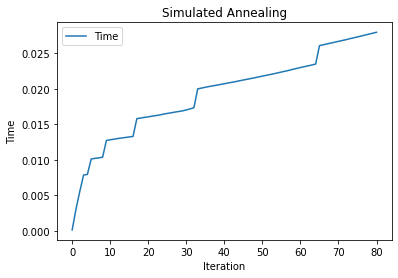

In [81]:
plt.plot(opt_curve['Iteration'],opt_curve['Time'],label='Time')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.legend()
plt.title('Simulated Annealing')
plt.show()

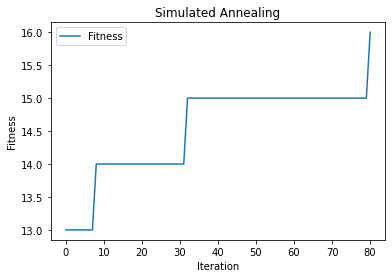

In [82]:
plt.plot(opt_curve['Iteration'],16-opt_curve['Fitness'],label='Fitness')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.title('Simulated Annealing')
plt.show()

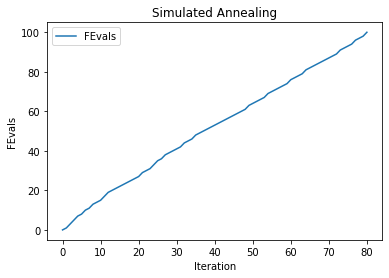

In [83]:
plt.plot(opt_curve['Iteration'],opt_curve['FEvals'],label='FEvals')
plt.xlabel('Iteration')
plt.ylabel('FEvals')
plt.legend()
plt.title('Simulated Annealing')
plt.show()

In [31]:
result2=best_state[['Fitness','FEvals','Time','State']]
result2['Algorithm']='Simulated Annealing'

In [32]:
color_indexes = literal_eval(run_stats_best_run['State'].tail(1).values[0])
ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
print(ordered_state)

[1, 0, 0, 2, 1, 0, 1, 2, 2, 0]


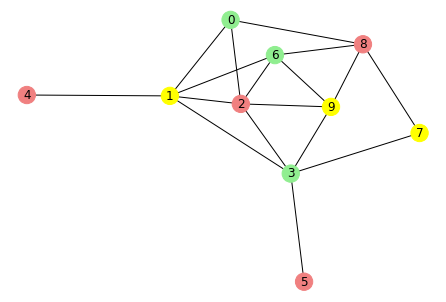

In [33]:
colors = ['lightcoral', 'lightgreen', 'yellow']
node_color_map = [colors[s] for s in ordered_state]

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 3),
        with_labels=True,
        node_color=node_color_map)
plt.show()

### Algorithm 3: Generic Algorithm

In [34]:
# Generate a new Max K problem using a fixed seed.
problem = MaxKColorGenerator().generate(seed=123456, number_of_nodes=10, max_connections_per_node=3, max_colors=3)

In [35]:
ga = GARunner(problem=problem,
                  experiment_name='max_k_ga',
                  output_directory=None,
                  seed=1234,
                  iteration_list=2 ** np.arange(11),
                  max_attempts=500,
                  population_sizes=[10, 20, 50, 100, 150],
                  mutation_rates=[0.1, 0.3, 0.5, 0.7])
                  
# the two data frames will contain the results
df_run_stats, df_run_curves = ga.run() 

In [36]:
df_run_stats.iloc[:60]

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
0,0,4.0,10,0.000586,"[2, 1, 0, 0, 0, 1, 1, 1, 2, 2]",10,0.1,1024
1,1,4.0,21,0.004369,"[2, 1, 0, 0, 0, 1, 1, 1, 2, 2]",10,0.1,1024
2,2,2.0,33,0.007907,"[1, 1, 0, 2, 0, 1, 0, 1, 2, 1]",10,0.1,1024
3,4,2.0,55,0.011735,"[1, 1, 0, 2, 0, 1, 0, 1, 2, 1]",10,0.1,1024
4,8,1.0,100,0.016829,"[0, 1, 2, 2, 2, 1, 0, 1, 2, 1]",10,0.1,1024
5,16,1.0,188,0.025005,"[0, 1, 2, 2, 2, 1, 0, 1, 2, 1]",10,0.1,1024
6,32,1.0,364,0.042190,"[0, 1, 2, 2, 2, 1, 0, 1, 2, 1]",10,0.1,1024
7,64,1.0,716,0.070712,"[0, 1, 2, 2, 2, 1, 0, 1, 2, 1]",10,0.1,1024
8,128,1.0,1420,0.118752,"[0, 1, 2, 2, 2, 1, 0, 1, 2, 1]",10,0.1,1024
9,256,0.0,2246,0.175324,"[0, 1, 2, 0, 2, 1, 0, 1, 2, 1]",10,0.1,1024


In [37]:
df_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000586,4.0,10.0,10,0.1,1024
1,1,0.004369,4.0,21.0,10,0.1,1024
2,2,0.007907,2.0,33.0,10,0.1,1024
3,3,0.010932,2.0,44.0,10,0.1,1024
4,4,0.011735,2.0,55.0,10,0.1,1024
...,...,...,...,...,...,...,...
533,16,0.025005,1.0,2568.0,150,0.7,1024
534,17,0.027758,1.0,2719.0,150,0.7,1024
535,18,0.028570,1.0,2870.0,150,0.7,1024
536,19,0.029389,1.0,3021.0,150,0.7,1024


In [38]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
best_runs

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
203,203,0.175324,0.0,2246.0,10,0.1,1024
337,133,0.124596,0.0,1477.0,10,0.3,1024
344,6,0.015216,0.0,79.0,10,0.5,1024
359,14,0.023439,0.0,168.0,10,0.7,1024
368,8,0.016829,0.0,191.0,20,0.1,1024
379,10,0.020275,0.0,234.0,20,0.3,1024
416,36,0.047601,0.0,780.0,20,0.5,1024
424,7,0.016021,0.0,169.0,20,0.7,1024
448,23,0.032782,0.0,1225.0,50,0.1,1024
456,7,0.016021,0.0,409.0,50,0.3,1024


In [39]:
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
best_curve_run

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
344,6,0.015216,0.0,79.0,10,0.5,1024


In [40]:
best_Population_Size = best_curve_run['Population Size'].iloc()[0]
best_Mutation_Rate = best_curve_run['Mutation Rate'].iloc()[0]
print(f'Best Population: {best_Population_Size}')
print(f'Best Mutation Rate: {best_Mutation_Rate}')

Best Population: 10
Best Mutation Rate: 0.5


In [41]:
run_stats_best_run = df_run_stats[(df_run_stats['Population Size'] == best_Population_Size) & (df_run_stats['Mutation Rate'] == best_Mutation_Rate)]
run_stats_best_run

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
24,0,4.0,10,0.000258,"[2, 1, 0, 0, 0, 1, 1, 1, 2, 2]",10,0.5,1024
25,1,3.0,22,0.002480,"[2, 0, 0, 2, 0, 1, 2, 0, 0, 1]",10,0.5,1024
26,2,3.0,33,0.004718,"[2, 0, 0, 2, 0, 1, 2, 0, 0, 1]",10,0.5,1024
27,4,2.0,56,0.007536,"[0, 1, 0, 2, 0, 1, 2, 1, 0, 1]",10,0.5,1024
28,8,0.0,79,0.010374,"[2, 1, 0, 2, 0, 1, 2, 1, 0, 1]",10,0.5,1024
29,16,0.0,79,0.010374,"[2, 1, 0, 2, 0, 1, 2, 1, 0, 1]",10,0.5,1024
30,32,0.0,79,0.010374,"[2, 1, 0, 2, 0, 1, 2, 1, 0, 1]",10,0.5,1024
31,64,0.0,79,0.010374,"[2, 1, 0, 2, 0, 1, 2, 1, 0, 1]",10,0.5,1024
32,128,0.0,79,0.010374,"[2, 1, 0, 2, 0, 1, 2, 1, 0, 1]",10,0.5,1024
33,256,0.0,79,0.010374,"[2, 1, 0, 2, 0, 1, 2, 1, 0, 1]",10,0.5,1024


In [42]:
best_state = run_stats_best_run.tail(1)
best_state

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
35,1024,0.0,79,0.010374,"[2, 1, 0, 2, 0, 1, 2, 1, 0, 1]",10,0.5,1024


In [43]:
opt_curve=df_run_curves[(df_run_curves['Population Size']==best_state['Population Size'].iloc[0]) & (df_run_curves['Mutation Rate']==best_state['Mutation Rate'].iloc[0])]
opt_curve

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
338,0,0.000586,4.0,10.0,10,0.5,1024
339,1,0.004369,3.0,22.0,10,0.5,1024
340,2,0.007907,3.0,33.0,10,0.5,1024
341,3,0.010932,2.0,45.0,10,0.5,1024
342,4,0.011735,2.0,56.0,10,0.5,1024
343,5,0.014392,2.0,67.0,10,0.5,1024
344,6,0.015216,0.0,79.0,10,0.5,1024


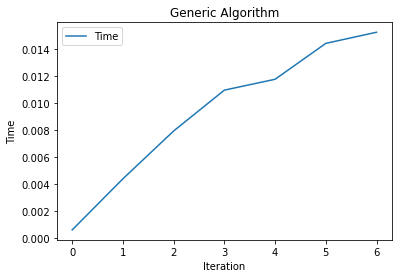

In [44]:
plt.plot(opt_curve['Iteration'],opt_curve['Time'],label='Time')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.legend()
plt.title('Generic Algorithm')
plt.show()

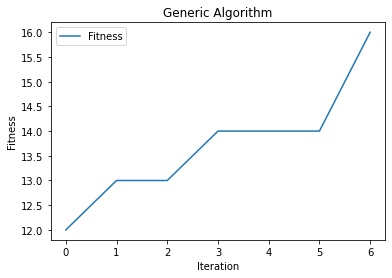

In [45]:
plt.plot(opt_curve['Iteration'],16-opt_curve['Fitness'],label='Fitness')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.title('Generic Algorithm')
plt.show()

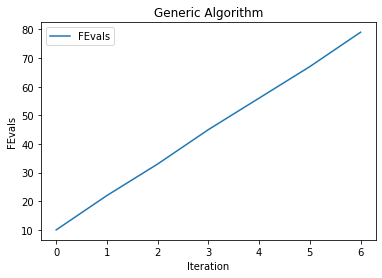

In [46]:
plt.plot(opt_curve['Iteration'],opt_curve['FEvals'],label='FEvals')
plt.xlabel('Iteration')
plt.ylabel('FEvals')
plt.legend()
plt.title('Generic Algorithm')
plt.show()

In [47]:
result3=best_state[['Fitness','FEvals','Time','State']]
result3['Algorithm']='Genetic Algorithm'

In [48]:
color_indexes = literal_eval(run_stats_best_run['State'].tail(1).values[0])
ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
print(ordered_state)

[2, 0, 0, 1, 2, 0, 2, 1, 1, 1]


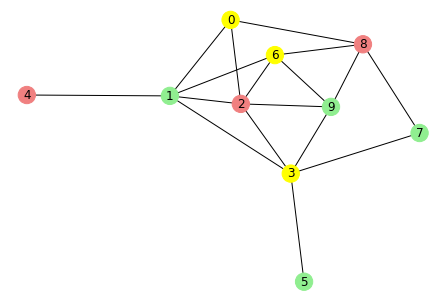

In [49]:
colors = ['lightcoral', 'lightgreen', 'yellow']
node_color_map = [colors[s] for s in ordered_state]

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 3),
        with_labels=True,
        node_color=node_color_map)
plt.show()

### Algorithm 4: MIMIC

In [50]:
# Generate a new Max K problem using a fixed seed.
problem = MaxKColorGenerator().generate(seed=123456, number_of_nodes=10, max_connections_per_node=3, max_colors=3)

In [51]:
mmc = MIMICRunner(problem=problem,
                      experiment_name='max_k_mimic',
                      output_directory=None,
                      seed=12345,
                      iteration_list=2 ** np.arange(11),
                      max_attempts=500,
                      population_sizes=[150, 200],
                      keep_percent_list=[0.25, 0.5, 0.75])
                      
# the two data frames will contain the results
df_run_stats, df_run_curves = mmc.run()

In [52]:
df_run_stats.iloc[:60]

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,5.0,150,0.008009,"[2, 1, 1, 1, 0, 1, 2, 2, 1, 2]",False,150,0.25,1024
1,1,1.0,302,0.079861,"[0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, ...",False,150,0.25,1024
2,2,1.0,453,0.131070,"[0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, ...",False,150,0.25,1024
3,4,0.0,756,0.207989,"[0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, ...",False,150,0.25,1024
4,8,0.0,756,0.207989,"[0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, ...",False,150,0.25,1024
5,16,0.0,756,0.207989,"[0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, ...",False,150,0.25,1024
6,32,0.0,756,0.207989,"[0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, ...",False,150,0.25,1024
7,64,0.0,756,0.207989,"[0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, ...",False,150,0.25,1024
8,128,0.0,756,0.207989,"[0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, ...",False,150,0.25,1024
9,256,0.0,756,0.207989,"[0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, ...",False,150,0.25,1024


In [53]:
df_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.008009,5.0,150.0,False,150,0.25,1024
1,1,0.079861,1.0,302.0,False,150,0.25,1024
2,2,0.131070,1.0,453.0,False,150,0.25,1024
3,3,0.170947,1.0,604.0,False,150,0.25,1024
4,4,0.207989,0.0,756.0,False,150,0.25,1024
...,...,...,...,...,...,...,...,...
520,1,0.079861,2.0,402.0,False,200,0.75,1024
521,2,0.131070,1.0,604.0,False,200,0.75,1024
522,3,0.170947,1.0,805.0,False,200,0.75,1024
523,4,0.207989,1.0,1006.0,False,200,0.75,1024


In [54]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
best_runs

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
4,4,0.207989,0.0,756.0,False,150,0.25,1024
9,4,0.207989,0.0,757.0,False,150,0.50,1024
513,1,0.079861,0.0,402.0,False,200,0.25,1024
518,4,0.207989,0.0,1006.0,False,200,0.50,1024
524,5,0.002911,0.0,1208.0,False,200,0.75,1024


In [55]:
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
best_curve_run

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
513,1,0.079861,0.0,402.0,False,200,0.25,1024


In [56]:
best_Keep_Percent = best_curve_run['Keep Percent'].iloc()[0]
best_Population_Size = best_curve_run['Population Size'].iloc()[0]
print(f'Best Percent: {best_Keep_Percent}')
print(f'Best Population Size: {best_Population_Size}')

Best Percent: 0.25
Best Population Size: 200


In [57]:
run_stats_best_run = df_run_stats[(df_run_stats['Keep Percent'] == best_Keep_Percent) & (df_run_stats['Population Size']==best_Population_Size)]
run_stats_best_run

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
36,0,5.0,200,0.004245,"[2, 1, 1, 1, 0, 1, 2, 2, 1, 2]",False,200,0.25,1024
37,1,0.0,402,0.044397,"[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, ...",False,200,0.25,1024
38,2,0.0,402,0.044397,"[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, ...",False,200,0.25,1024
39,4,0.0,402,0.044397,"[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, ...",False,200,0.25,1024
40,8,0.0,402,0.044397,"[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, ...",False,200,0.25,1024
41,16,0.0,402,0.044397,"[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, ...",False,200,0.25,1024
42,32,0.0,402,0.044397,"[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, ...",False,200,0.25,1024
43,64,0.0,402,0.044397,"[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, ...",False,200,0.25,1024
44,128,0.0,402,0.044397,"[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, ...",False,200,0.25,1024
45,256,0.0,402,0.044397,"[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, ...",False,200,0.25,1024


In [58]:
best_state = run_stats_best_run.tail(1)
best_state

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
47,1024,0.0,402,0.044397,"[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, ...",False,200,0.25,1024


In [59]:
opt_curve=df_run_curves[(df_run_curves['Keep Percent']==best_state['Keep Percent'].iloc[0]) & (df_run_curves['Population Size']==best_state['Population Size'].iloc[0])]
opt_curve

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
512,0,0.008009,5.0,200.0,False,200,0.25,1024
513,1,0.079861,0.0,402.0,False,200,0.25,1024


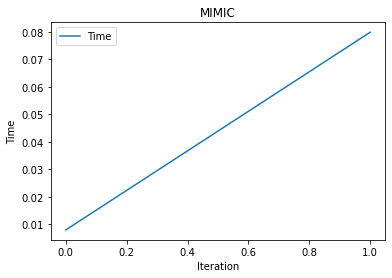

In [60]:
plt.plot(opt_curve['Iteration'],opt_curve['Time'],label='Time')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.legend()
plt.title('MIMIC')
plt.show()

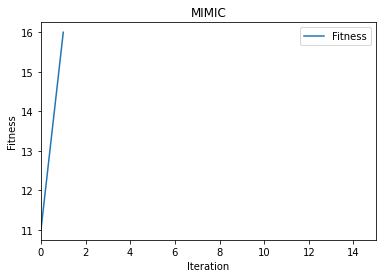

In [61]:
plt.plot(opt_curve['Iteration'],16-opt_curve['Fitness'],label='Fitness')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.xlim([0,15])
plt.legend()
plt.title('MIMIC')
plt.show()

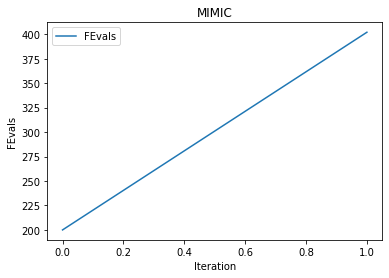

In [62]:
plt.plot(opt_curve['Iteration'],opt_curve['FEvals'],label='FEvals')
plt.xlabel('Iteration')
plt.ylabel('FEvals')
plt.legend()
plt.title('MIMIC')
plt.show()

In [63]:
result4=best_state[['Fitness','FEvals','Time','State']]
result4['Algorithm']='MIMIC'

In [64]:
color_indexes = literal_eval(run_stats_best_run['State'].tail(1).values[0])
ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
print(ordered_state)

[0.0, 1.0, 1.0, 2.0, 0.0, 1.0, 0.0, 2.0, 2.0, 1.0]


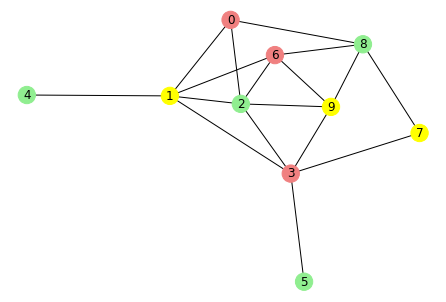

In [65]:
colors = ['lightcoral', 'lightgreen', 'yellow']
node_color_map = [colors[int(s)] for s in ordered_state]

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 3),
        with_labels=True,
        node_color=node_color_map)
plt.show()

### Algorithm Comparison

In [66]:
results=pd.concat([result1,result2,result3,result4])

In [68]:
results['Fitness']=16-results['Fitness']

In [69]:
results

,Fitness,FEvals,Time,State,Algorithm
11,16.0,21,0.014627,"[0, 1, 2, 0, 0, 2, 0, 1, 2, 1]",Randomized Hill Climbing
11,16.0,100,0.027435,"[1, 2, 0, 1, 0, 0, 1, 2, 0, 2]",Simulated Annealing
35,16.0,79,0.010374,"[2, 1, 0, 2, 0, 1, 2, 1, 0, 1]",Genetic Algorithm
47,16.0,402,0.044397,"[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, ...",MIMIC
